# IMPORTING THE DEPENDENCIES

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import requests


### READING THE DATA

In [5]:
data = pd.read_csv('Data/Training.csv')

In [6]:
### PRINTING THE FIRST 5 ROWS OF THE DATASET

In [7]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,diseases
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [8]:
### PRINTING THE NUMBER OF ROWS AND COLUMNS

In [9]:
data.shape

(4920, 133)

In [10]:
##GETTING THE STATISTICAL MEASURES OF THE DATA
data.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
#CHECKING IF THERE IS ANY MISSING VALUES
data.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
diseases                0
Length: 133, dtype: int64

In [12]:
#CHECKING THE NUMBER OF ROWS PER DISEASE
data['diseases'].value_counts()

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                                120
Allergy      

The column labeled 'DISEASES' represents all the diseases in our datasets. There are 41 diseases in our dataset

In [14]:
## SEPERATING THE DATA FROM LABELS
X = data.drop(columns = 'diseases', axis=1)
Y = data['diseases']

In [15]:
#Printing X and Y
print(X)

      itching  skin_rash  nodal_skin_eruptions  continuous_sneezing  \
0           1          1                     1                    0   
1           0          1                     1                    0   
2           1          0                     1                    0   
3           1          1                     0                    0   
4           1          1                     1                    0   
...       ...        ...                   ...                  ...   
4915        0          0                     0                    0   
4916        0          1                     0                    0   
4917        0          0                     0                    0   
4918        0          1                     0                    0   
4919        0          1                     0                    0   

      shivering  chills  joint_pain  stomach_pain  acidity  ulcers_on_tongue  \
0             0       0           0             0        0         

In [16]:
#Printing Y
print(Y)

0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                                   Impetigo
Name: diseases, Length: 4920, dtype: object


## DATA STANDARDIZATION

In [57]:
scaler = StandardScaler()

In [58]:
scaler.fit(X)

StandardScaler()

In [59]:
standardized_data = scaler.transform(X)

In [60]:
print(standardized_data)

[[ 2.50132708  2.29336913  6.6749948  ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778  2.29336913  6.6749948  ... -0.15401412 -0.15401412
  -0.15401412]
 [ 2.50132708 -0.4360397   6.6749948  ... -0.15401412 -0.15401412
  -0.15401412]
 ...
 [-0.39978778 -0.4360397  -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778  2.29336913 -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778  2.29336913 -0.14981285 ...  6.49291111  6.49291111
   6.49291111]]


In [61]:
X = standardized_data
Y = data['diseases']

In [62]:
print(X)
print(Y)

[[ 2.50132708  2.29336913  6.6749948  ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778  2.29336913  6.6749948  ... -0.15401412 -0.15401412
  -0.15401412]
 [ 2.50132708 -0.4360397   6.6749948  ... -0.15401412 -0.15401412
  -0.15401412]
 ...
 [-0.39978778 -0.4360397  -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778  2.29336913 -0.14981285 ... -0.15401412 -0.15401412
  -0.15401412]
 [-0.39978778  2.29336913 -0.14981285 ...  6.49291111  6.49291111
   6.49291111]]
0                              Fungal infection
1                              Fungal infection
2                              Fungal infection
3                              Fungal infection
4                              Fungal infection
                         ...                   
4915    (vertigo) Paroymsal  Positional Vertigo
4916                                       Acne
4917                    Urinary tract infection
4918                                  Psoriasis
4919                        

Train Test Split

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [18]:
print(X.shape, X_train.shape, X_test.shape)

(4920, 132) (3936, 132) (984, 132)


## TRAINING THE MODELS

## SUPPORT VECTOR MODEL

In [19]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [20]:
##TRAINING THE SUPPORT VECTOR MACHINE CLASSIFIER
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

ACCURACY SCORE


In [21]:
##accuracy score on the TRAINING DATA #SUPPORT VECTOR
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [22]:
##Printing the accuracy score of the training data
print("(SVM) Accuracy score of the training data is: ", training_data_accuracy)

(SVM) Accuracy score of the training data is:  1.0


In [26]:
##accuracy score on the TESTING DATA
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [27]:
##Printing the accuracy score of the testing data
print("(SVM) Accuracy score of the testing data is: ", testing_data_accuracy)

(SVM) Accuracy score of the testing data is:  1.0


MAKING A PREDICTIVE SYSTEM - SVM

In [28]:
input_data =(0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

#changing the input_data to numpy array
input_data_as_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_array.reshape(1, -1)

#standardizing the input data
std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

NameError: name 'scaler' is not defined

CONFUSION MATRIX

In [72]:
#iIMPORTING THE CONFUSION MATRIX MODEL
from sklearn.metrics import confusion_matrix

In [73]:
cf_matrix = confusion_matrix(Y_train, X_train_prediction)
print(cf_matrix)

[[96  0  0 ...  0  0  0]
 [ 0 96  0 ...  0  0  0]
 [ 0  0 96 ...  0  0  0]
 ...
 [ 0  0  0 ... 96  0  0]
 [ 0  0  0 ...  0 96  0]
 [ 0  0  0 ...  0  0 96]]


<Axes: >

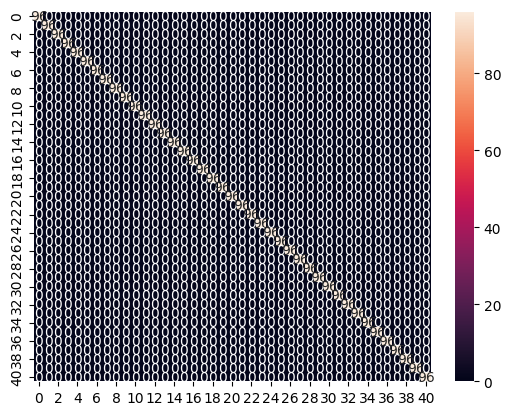

In [74]:
#ploting
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

### KMEANS MODEL

In [75]:
from sklearn.cluster import KMeans
# for i in range(1,11):
#     kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=0)
#     kmeans.fit(X)
#     wss.append(kmeans.intertia_)

## LOGISTIC REGRESSION

In [29]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [30]:
#training the LogisticRegression with Training Data
logistic.fit(X_train, Y_train)

LogisticRegression()

ACCURACY SCORE

In [31]:
##accuracy score on the TRAINING DATA #SUPPORT VECTOR
X_train_prediction_lr = logistic.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction_lr, Y_train)

In [32]:
##Printing the accuracy score of the training data
print("LOGISTIC Accuracy score of the training data is: ", training_data_accuracy)

LOGISTIC Accuracy score of the training data is:  1.0


In [33]:
##accuracy score on the TESTING DATA
X_test_prediction_lr = logistic.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction_lr, Y_test)

In [34]:
##Printing the accuracy score of the testing data
print("LOGISTIC Accuracy score of the testing data is: ", testing_data_accuracy)

LOGISTIC Accuracy score of the testing data is:  1.0


MAKING A SYSTEM PREDICTIVE - LOGISTIC REGRESSION

In [35]:
input_data =(0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

#changing the input_data to numpy array
input_data_as_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_array.reshape(1, -1)

#standardizing the input data
std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = logistic.predict(std_data)
print(prediction)

NameError: name 'scaler' is not defined

In [ ]:
#iIMPORTING THE CONFUSION MATRIX MODEL
from sklearn.metrics import confusion_matrix

In [ ]:
cf_matrix = confusion_matrix(Y_train, X_train_prediction_lr)
print(cf_matrix)

In [ ]:
#ploting
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)

## DESICION TREE

In [87]:
#IMPORTING THE ALGORITHM
from sklearn import tree
dec_tree = tree.DecisionTreeClassifier()

In [95]:
#TRAINING THE DECISION TREE WITH THE TRAINING DATA
dec_tree = dec_tree.fit(X_train, Y_train)

ACCURACY SCORE

In [96]:
##accuracy score on the TRAINING DATA #SUPPORT VECTOR
X_train_prediction_decTree = dec_tree.predict(X_train)
training_data_accuracy_decTree = accuracy_score(X_train_prediction_decTree, Y_train)

##Printing the accuracy score of the training data
print("DECISION TREEE Accuracy score of the training data is: ", training_data_accuracy_decTree)

DECISION TREEE Accuracy score of the training data is:  1.0


In [97]:
##accuracy score on the TESTING DATA
X_test_prediction_decTree = dec_tree.predict(X_test)
testing_data_accuracy_decTree = accuracy_score(X_test_prediction_decTree, Y_test)

##Printing the accuracy score of the testing data
print("DECISION TREE Accuracy score of the testing data is: ", testing_data_accuracy_decTree)

DECISION TREE Accuracy score of the testing data is:  1.0


MAKING A SYSTEM PREDICTIVE - DECISION TREE

In [98]:
input_data =(0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)

#changing the input_data to numpy array
input_data_as_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_array.reshape(1, -1)

#standardizing the input data
std_data = scaler.transform(input_data_reshaped)
#print(std_data)

prediction = dec_tree.predict(std_data)
print(prediction)

['Paralysis (brain hemorrhage)']


C:\Users\sjr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### PLOTTING 

[Text(0.9713261648745519, 0.9912280701754386, 'x[55] <= 3.083\ngini = 0.976\nsamples = 3936\nvalue = [96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96\n96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96\n96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96\n96, 96, 96, 96, 96]'),
 Text(0.956989247311828, 0.9736842105263158, 'x[77] <= 3.083\ngini = 0.975\nsamples = 3840\nvalue = [96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 0, 96\n96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96\n96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96\n96, 96, 96, 96, 96]'),
 Text(0.942652329749104, 0.956140350877193, 'x[36] <= 3.083\ngini = 0.974\nsamples = 3744\nvalue = [96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 0, 96\n96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96\n96, 0, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96\n96, 96, 96, 96, 96]'),
 Text(0.9283154121863799, 0.9385964912280702, 'x[114] <= 3.083\ngini = 0.974\nsamples = 3648\nvalue = [96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 0, 0\n96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96\n96

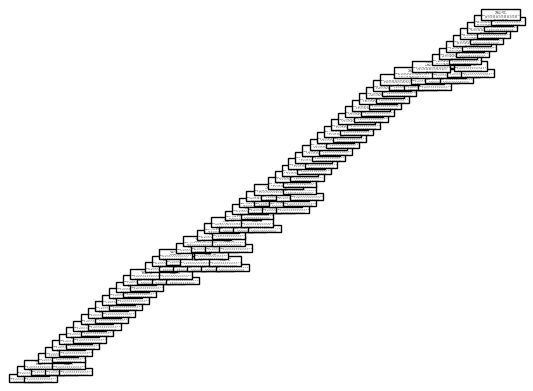

In [99]:
tree.plot_tree(dec_tree)